In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
%matplotlib notebook

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [38]:
def plot_scalar(scalar, smoothing=0.6, index=0):
    smoothed = smooth(scalar, smoothing)
    index = str(index)
    plt.plot(scalar, 'C' + index, label=index)
    plt.plot(smoothed, 'C' + index, alpha=0.3)
    plt.legend()

In [32]:
def plot_scalars(scalars, smoothing=0.6):
    for i, scalar in enumerate(scalars):
        plot_scalar(scalar, index=i)

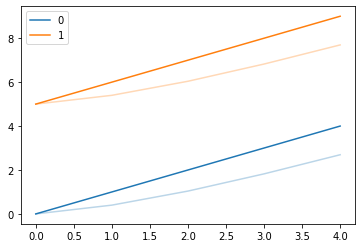

In [41]:
scalar = [0,1,2,3,4]
scalar_2 = [5, 6, 7, 8 ,9]

scalars = [scalar, scalar_2]

# plot_scalar(scalar)

plot_scalars(scalars)

<IPython.core.display.Javascript object>


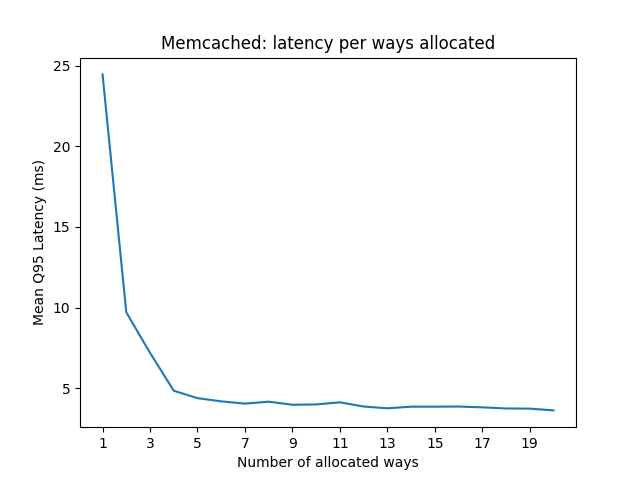

Text(0.5, 1.0, 'Memcached: latency per ways allocated')

In [54]:
mean_latency = [24.46, 9.71, 7.2, 4.85, 4.39, 4.19, 4.05, 4.17, 3.98, 4, 4.13, 3.87, 3.76, 3.86, 3.86, 3.87, 3.82, 3.75, 3.74, 3.63]
ways = list(range(1, 21))

plt.plot(ways, mean_latency)
plt.xticks(np.arange(min(ways), max(ways)+1, 2))
plt.xlabel("Number of allocated ways")
plt.ylabel("Mean Q95 Latency (ms)")
plt.title("Memcached: latency per ways allocated")